In [4]:
import joblib
import numpy as np

model=joblib.load('brain_tumor_kmeans.sav')
tumorLabel=4

In [5]:
import cv2
import os
from matplotlib import pyplot as plt

test_img_path='test_images'
test_img_names = os.listdir(test_img_path)

In [6]:
for test_img_name in test_img_names:
    img_path = os.path.join(test_img_path, test_img_name)
    
    img = cv2.imread(img_path, 0)
    imgOriginal = cv2.imread(img_path)
    
    height, width = img.shape
    imgFlatten=img.reshape(height*width,1)
    labels=model.predict(imgFlatten)
    labels2D=labels.reshape(height,width)
    mask=(labels2D==tumorLabel)
    tumorExtracted=np.bitwise_and(mask,img)
    contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print('no. contours:',len(contours))

    for cnt in contours:
        #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
        area=cv2.contourArea(cnt)
        #print(area)
        if(area>1000):
            
            cv2.drawContours(imgOriginal, [cnt],-1,(0,255,255),2)
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(imgOriginal,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.rectangle(imgOriginal,(x,y),(x+120,y-40),(0,255,0),-1)
            cv2.putText(imgOriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            
            cv2.imshow('Brian Tumors',imgOriginal)
            cv2.waitKey(5000)

cv2.destroyAllWindows()
            
    

no. contours: 2170
no. contours: 3793
no. contours: 3388
no. contours: 3389
no. contours: 3778
no. contours: 2875
no. contours: 2821
no. contours: 3361
no. contours: 3401
no. contours: 2364
no. contours: 2575
no. contours: 1399
no. contours: 2094


In [7]:
import numpy as np

array1 = np.array([2,547,55,589,456,5,7,87,8,5])
array2 = (array1 == 5)
array2

array([False, False, False, False, False,  True, False, False, False,
        True])

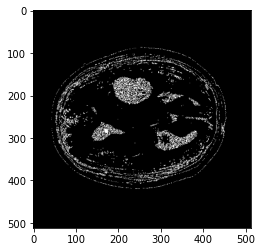

In [8]:
tumorExtracted=np.bitwise_and(mask,img)

from matplotlib import pyplot as plt

plt.imshow(tumorExtracted,cmap='gray')
plt.show()

In [9]:
contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('no. contours:',len(contours))

for cnt in contours:
    #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
    area=cv2.contourArea(cnt)
    #print(area)
    if(area>500):

        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(imgOriginal,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(imgOriginal,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(imgOriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)

no. contours: 2094
